### Реализация градиентного спуска

In [205]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression
from sklearn.linear_model import SGDRegressor
import pylab
import matplotlib.pyplot as plt
from scipy import stats 

In [206]:
x, y = make_regression(
    n_samples = 1000,
    n_features = 1,
    n_informative = 1,
    random_state = 271828,
    noise = 20
)

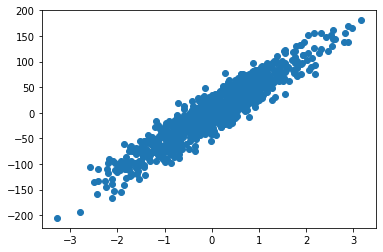

In [207]:
pylab.plot(x, y, 'o')
pylab.show()

In [208]:
# Размер выборки.
m, n = np.shape(x)

In [209]:
# Добавим вектор-столбец коэффициентов x_0 (random).
x_0 = np.random.uniform(low=0, high=1, size=m)

In [210]:
# Сольём 2 вектора в 2 вектор-столбца.
x_gd = np.c_[x_0, x]
x_gd.shape

(1000, 2)

In [211]:
def gradient_descent(x, y, numIterations, alpha):
    """
        Функция реализует алгоритм градиентного спуска.
    """
    m = x.shape[0]
    # Веса: [rand(0, 1), rand(0, 1)]
    theta = np.random.uniform(size=2)
    x_transpose = x.transpose()
    
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        # Потери.
        loss = hypothesis - y
        # Функция потерь (MSE).
        J = np.sum(loss ** 2) / (2 * m)
        if iter % (numIterations // 10) == 0:
            print("iter %s | J: %.10f"%(iter, J))
        # Градиент.
        gradient = np.dot(x_transpose, loss) / m
        # Приближение по весам.
        theta = theta - alpha * gradient
        
    return theta

In [212]:
# Parameters
alpha = 0.1
numIterations = 5000

In [213]:
%%time
theta = gradient_descent(x_gd, y, numIterations=numIterations, alpha=alpha)
print('\nTheta = [{:.4f}, {:.4f}]\n'.format(*theta))

iter 0 | J: 1654.6607412209
iter 500 | J: 195.8608363454
iter 1000 | J: 195.8608363454
iter 1500 | J: 195.8608363454
iter 2000 | J: 195.8608363454
iter 2500 | J: 195.8608363454
iter 3000 | J: 195.8608363454
iter 3500 | J: 195.8608363454
iter 4000 | J: 195.8608363454
iter 4500 | J: 195.8608363454

Theta = [0.9356, 55.9801]

Wall time: 110 ms


_____

### Проверка реализации

In [214]:
model = SGDRegressor(alpha=alpha, max_iter=numIterations)

In [215]:
%%time 

model.fit(x, y)

Wall time: 2.99 ms


SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [216]:
# Theta из SGDRegressor.
print('Mine gradient_descent ------\nTheta = [{:.4f}, {:.4f}]\n'.format(*theta))
print('SGDRegressor ------\nTheta = [{:.4f}, {:.4f}]\n'.format(*model.intercept_, *model.coef_))

Mine gradient_descent ------
Theta = [0.9356, 55.9801]

SGDRegressor ------
Theta = [0.6531, 50.5827]



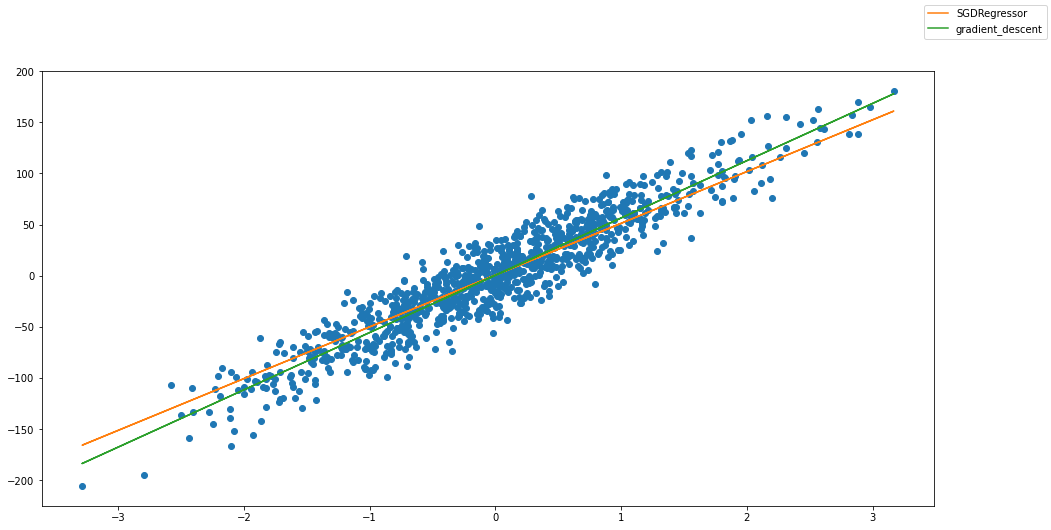

In [220]:
figure = plt.figure(figsize=(16, 8))
pylab.plot(x, y, 'o')
y_sgd = x * model.coef_ + model.intercept_
pylab.plot(x, y_sgd, label='SGDRegressor')
pylab.plot(x, y_gd[:, 1], label='gradient_descent')
figure.legend()
pylab.show()